In [4]:
from pathlib import Path
from scipy.io import loadmat

In [3]:
path_label = Path('/home/jupyter/.fastai/data/devkit')

In [5]:
mat_data = loadmat(path_label/'cars_train_annos.mat')

## Getting Bounding Box

In [6]:
x1_mat = mat_data['annotations']["bbox_x1"].squeeze()
x2_mat = mat_data['annotations']["bbox_x2"].squeeze()
y1_mat = mat_data['annotations']["bbox_y1"].squeeze()
y2_mat = mat_data['annotations']["bbox_y2"].squeeze()

In [34]:
# x1 = Left, y1 = Upper, x2 = Right, y2 = Lower
bbox_list = [(x1[0][0], y1[0][0], x2[0][0], y2[0][0]) for x1, x2, y1, y2 in zip(x1_mat, x2_mat, y1_mat, y2_mat)]

# Getting image files

In [10]:
fname = mat_data['annotations']["fname"].squeeze()

In [13]:
path = Path('/home/jupyter/.fastai/data/cars_train')
fname_list = [path/f[0] for f in fname]

## Cropping 

In [31]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
crop_path = Path('/home/jupyter/.fastai/data/cars_cropped_train')

In [19]:
fname_list[0].parts[-1]

'00001.jpg'

In [59]:
im = Image.open(fname_list[0])

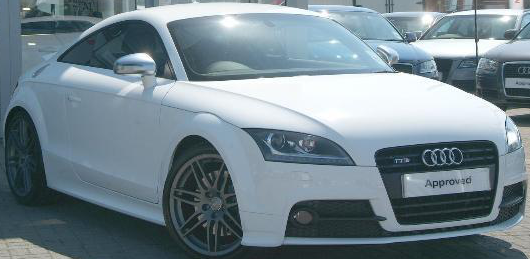

In [62]:
im.crop(bbox_list[0])

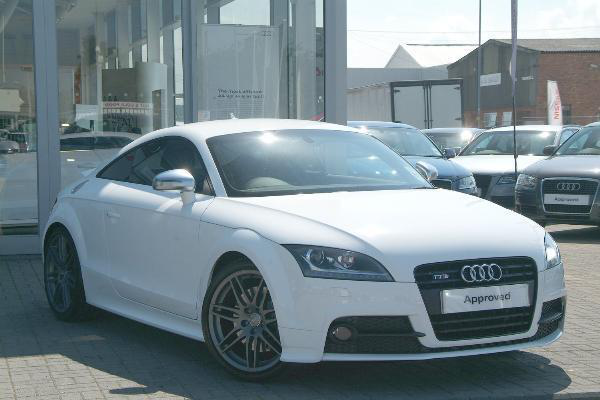

In [63]:
im

In [65]:
for fname, bbox in zip(fname_list, bbox_list):
    im = Image.open(fname)
    im_cropped = im.crop(bbox)
    im_cropped.save(crop_path/fname.parts[-1])

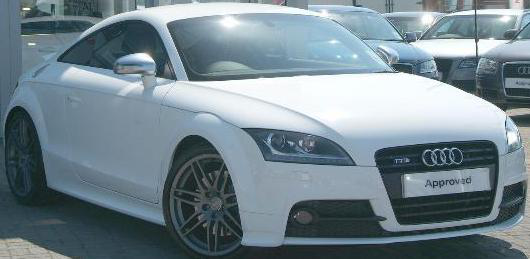

In [67]:
image = Image.open(crop_path/fname_list[0].parts[-1])
image